# Freezing Early Layers

In this notebook, I trained the network for an additional 10 epochs after freezing the first Dense layer. This allows the second Dense layer to learn to optimize the cost based on the exact state of the first layer. During normal training, since the first layer is also updated, the second layer may learn weights and biases that are unoptimal for the final state of the first layer.

This technique does show some promise, as the additional training seems to boost the network performance higher than what was achieved from standard training.

## Load MNIST data

In [1]:
from typing import *
import numpy as np
from matplotlib import pyplot as plt
from data_loader import load_data

In [2]:
np.set_printoptions(suppress=True, precision=2)
np.random.seed(1)

In [3]:
# Could take 10 to 20 seconds
train_images, train_labels, test_images, test_labels = load_data("mnist")

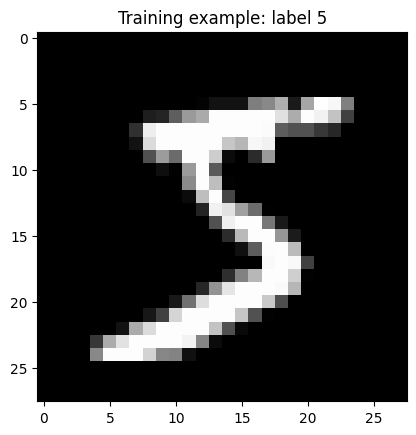

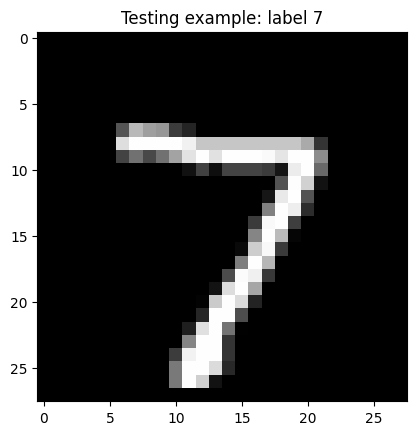

In [4]:
image, label = train_images[0], train_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Training example: label " + str(np.argmax(label)))
plt.show()

image, label = test_images[0], test_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Testing example: label " + str(label))
plt.show()

#### Flatten images & collect into tuples

In [5]:
training_data = [(x.flatten(), y) for x, y in zip(train_images, train_labels)]
testing_data = [(x.flatten(), y) for x, y in zip(test_images, test_labels)]

## Initialize the network

In [6]:
from network import *
from layers import *
from loss import *

In [7]:
layers = [
    Dense(784, 30, regularization_parameter=5),
    LeakyReLU(30, 0.1),
    Dense(30, 10, regularization_parameter=5),
    LeakyReLU(10, 0.1),
    Softmax(10)
]

network = Network(
    layers,
    learning_rate=0.02,
    mini_batch_size=10
)

### Feed forward with random parameters

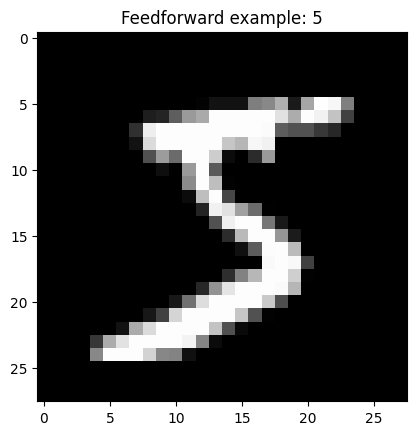

Network output: [0.02 0.02 0.11 0.03 0.03 0.11 0.47 0.05 0.08 0.07]


In [8]:
# network.reset()
image, label = training_data[0]

plt.imshow(image.reshape((28, 28)), interpolation="nearest", cmap='gray')
plt.title("Feedforward example: " + str(np.argmax(label)))
plt.show()
network.set_training(False)
print("Network output:", network.forward(image))

As expected, the network outputs 10 random numbers from 0 to 1.

## Train the network on MNIST

In [9]:
network.reset()
# Setting training to false speeds up forward passes, as the network does not
# have store information necessary for backpropagation.
network.set_training(True)

# The testing accuracy on Epoch 0 should be ~10% when correctly initialized.
correct = network.evaluate(testing_data)
percent = round(correct / 100, 1)
print(f"Epoch 0: {correct} / 10000 ({percent}%)")

network.train(
    epochs=30,
    training_data=training_data, 
    loss=NLL(),
    test_data=testing_data
)

Epoch 0: 1009 / 10000 (10.1%)
Epoch 1: 9224 / 10000 (92.2%)
Epoch 2: 9341 / 10000 (93.4%)
Epoch 3: 9471 / 10000 (94.7%)
Epoch 4: 9484 / 10000 (94.8%)
Epoch 5: 9513 / 10000 (95.1%)
Epoch 6: 9527 / 10000 (95.3%)
Epoch 7: 9572 / 10000 (95.7%)
Epoch 8: 9581 / 10000 (95.8%)
Epoch 9: 9609 / 10000 (96.1%)
Epoch 10: 9607 / 10000 (96.1%)
Epoch 11: 9589 / 10000 (95.9%)
Epoch 12: 9621 / 10000 (96.2%)
Epoch 13: 9625 / 10000 (96.2%)
Epoch 14: 9619 / 10000 (96.2%)
Epoch 15: 9615 / 10000 (96.2%)
Epoch 16: 9620 / 10000 (96.2%)
Epoch 17: 9599 / 10000 (96.0%)
Epoch 18: 9634 / 10000 (96.3%)
Epoch 19: 9641 / 10000 (96.4%)
Epoch 20: 9662 / 10000 (96.6%)
Epoch 21: 9627 / 10000 (96.3%)
Epoch 22: 9621 / 10000 (96.2%)
Epoch 23: 9649 / 10000 (96.5%)
Epoch 24: 9638 / 10000 (96.4%)
Epoch 25: 9643 / 10000 (96.4%)
Epoch 26: 9638 / 10000 (96.4%)
Epoch 27: 9632 / 10000 (96.3%)
Epoch 28: 9651 / 10000 (96.5%)
Epoch 29: 9657 / 10000 (96.6%)
Epoch 30: 9657 / 10000 (96.6%)


### Train with first layer frozen

While training with a lower learning rate would be more optimal, I was not using any learning rate scheduling or anything for other runs, so I decided to just use the same learning rate to be able to compare the performance with previous runs.

The standard network alone is able to reach an accuracy of 96.6% on epoch 20, without significant improvements after that. After training with the first layer frozen, the network achieves a 96.7% accuracy. 

While this is admittedly not a significant increase, I found that with different seeds, the increase could be anywhere from 0.1 to 0.3%.

The effect on Fashion MNIST is more pronounced (shown next).

In [10]:
network.set_training(False)

# The testing accuracy on Epoch 0 should be ~10% when correctly initialized.
correct = network.evaluate(testing_data)
percent = round(correct / 100, 1)
print(f"Epoch 0: {correct} / 10000 ({percent}%)")

network.train(
    epochs=10,
    training_data=training_data, 
    loss=NLL(),
    test_data=testing_data,
    frozen_layers=[0]
)

Epoch 0: 9657 / 10000 (96.6%)
Epoch 1: 9673 / 10000 (96.7%)
Epoch 2: 9666 / 10000 (96.7%)
Epoch 3: 9670 / 10000 (96.7%)
Epoch 4: 9658 / 10000 (96.6%)
Epoch 5: 9660 / 10000 (96.6%)
Epoch 6: 9654 / 10000 (96.5%)
Epoch 7: 9665 / 10000 (96.7%)
Epoch 8: 9659 / 10000 (96.6%)
Epoch 9: 9658 / 10000 (96.6%)
Epoch 10: 9660 / 10000 (96.6%)


## Load Fashion MNIST data

In [11]:
# Could take 10 to 20 seconds
train_images, train_labels, test_images, test_labels = load_data("fashion_mnist")

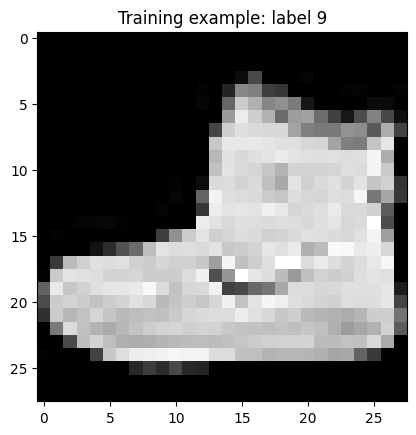

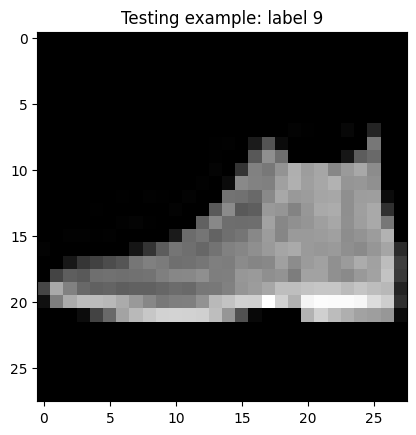

In [12]:
image, label = train_images[0], train_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Training example: label " + str(np.argmax(label)))
plt.show()

image, label = test_images[0], test_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Testing example: label " + str(label))
plt.show()

#### Flatten images & collect into tuples

In [13]:
training_data = [(x.flatten(), y) for x, y in zip(train_images, train_labels)]
testing_data = [(x.flatten(), y) for x, y in zip(test_images, test_labels)]

## Train the network on Fashion MNIST

In [14]:
network.reset()
network.set_training(True)

# The testing accuracy on Epoch 0 should be ~10% when correctly initialized.
correct = network.evaluate(testing_data)
percent = round(correct / 100, 1)
print(f"Epoch 0: {correct} / 10000 ({percent}%)")

# Training for more epochs will yield better results.
# This example is just meant to demonstrate the network is able to learn
# correctly.
network.train(
    epochs=30,
    training_data=training_data, 
    loss=MSE(),
    test_data=testing_data
)

Epoch 0: 1056 / 10000 (10.6%)
Epoch 1: 8091 / 10000 (80.9%)
Epoch 2: 8374 / 10000 (83.7%)
Epoch 3: 8367 / 10000 (83.7%)
Epoch 4: 8535 / 10000 (85.4%)
Epoch 5: 8530 / 10000 (85.3%)
Epoch 6: 8500 / 10000 (85.0%)
Epoch 7: 8592 / 10000 (85.9%)
Epoch 8: 8641 / 10000 (86.4%)
Epoch 9: 8624 / 10000 (86.2%)
Epoch 10: 8598 / 10000 (86.0%)
Epoch 11: 8547 / 10000 (85.5%)
Epoch 12: 8557 / 10000 (85.6%)
Epoch 13: 8554 / 10000 (85.5%)
Epoch 14: 8695 / 10000 (87.0%)
Epoch 15: 8680 / 10000 (86.8%)
Epoch 16: 8657 / 10000 (86.6%)
Epoch 17: 8670 / 10000 (86.7%)
Epoch 18: 8658 / 10000 (86.6%)
Epoch 19: 8649 / 10000 (86.5%)
Epoch 20: 8674 / 10000 (86.7%)
Epoch 21: 8700 / 10000 (87.0%)
Epoch 22: 8739 / 10000 (87.4%)
Epoch 23: 8712 / 10000 (87.1%)
Epoch 24: 8698 / 10000 (87.0%)
Epoch 25: 8694 / 10000 (86.9%)
Epoch 26: 8693 / 10000 (86.9%)
Epoch 27: 8676 / 10000 (86.8%)
Epoch 28: 8664 / 10000 (86.6%)
Epoch 29: 8596 / 10000 (86.0%)
Epoch 30: 8758 / 10000 (87.6%)


### Train with first layer frozen

The standard network alone is able to reach an accuracy of 87.6% on epoch 30, but was bouncing around in the 86-87 percentile range. After training with the first layer frozen, the network consistently achieves scores in the high 87th percentile range, maxing out at 87.9% on epoch 5.

In [15]:
network.set_training(False)

# The testing accuracy on Epoch 0 should be ~10% when correctly initialized.
correct = network.evaluate(testing_data)
percent = round(correct / 100, 1)
print(f"Epoch 0: {correct} / 10000 ({percent}%)")

network.train(
    epochs=10,
    training_data=training_data, 
    loss=NLL(),
    test_data=testing_data,
    frozen_layers=[0]
)

Epoch 0: 8758 / 10000 (87.6%)
Epoch 1: 8765 / 10000 (87.6%)
Epoch 2: 8771 / 10000 (87.7%)
Epoch 3: 8779 / 10000 (87.8%)
Epoch 4: 8760 / 10000 (87.6%)
Epoch 5: 8787 / 10000 (87.9%)
Epoch 6: 8783 / 10000 (87.8%)
Epoch 7: 8778 / 10000 (87.8%)
Epoch 8: 8777 / 10000 (87.8%)
Epoch 9: 8777 / 10000 (87.8%)
Epoch 10: 8786 / 10000 (87.9%)
